In [13]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg

Зададим сложную математическую функцию на отрезке [1, 15].

In [ ]:
def f(x):
    return math.sin(x / 5.) * math.exp(x / 10.) + 5 * math.exp(-x / 2.)

x = np.arange(1, 16, 0.1)
y = list(map(f, x))

Сформируем график этой функции.

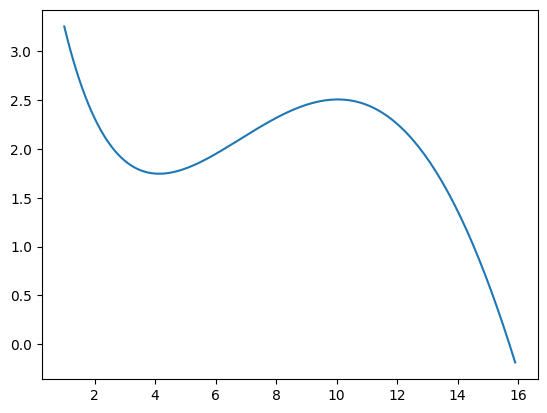

In [8]:
plt.plot(x, y)

Возьмем 2 крайние точки отрезка [1, 15] и проведем через них прямую. Для этого составим систему линейных уравнений, подставляя эти точки в общее уравнение прямой y = ax + b. Получим:

\begin{cases} a + b = f(1) \approx 3.25 \\ 15a + b = f(15) \approx 0.64 \end{cases}

Решим получившуюся систему линейных уравнений с помощью функции scipy.linalg.solve. Получив коэффициенты прямой, построим ее:

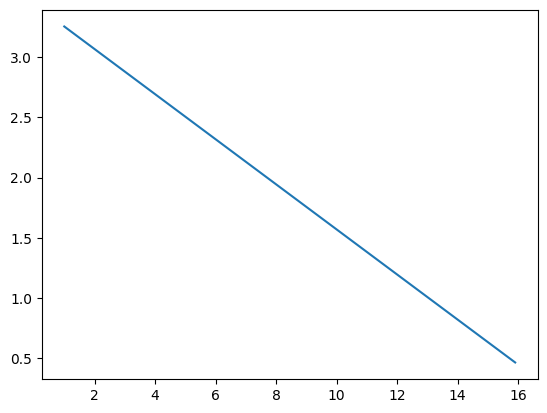

In [48]:
matrix_A2 = np.matrix([[1, 1], [15, 1]])
matrix_B2 = np.matrix([[f(1)], [f(15)]])
approx_params_2 = linalg.solve(matrix_A2, matrix_B2)

def y_approx_2(x):
    return approx_params_2[0] * x + approx_params_2[1]

plt.plot(x, list(map(y_approx_2, x)))

Возьмем 3 равноудаленных точек на отрезке [1, 15] - 1, 8, 15. Проведем через эти 3 точки параболу. Для этого решим следующую систему линейных уравнений:

\begin{cases} x_1 + x_2 + x_3 = f(1) \approx 3.25 \\ 64x_1 + 8x_2 + x_3 = f(8) \approx 2.32 \\ 225x_1 + 15x_2 + x_3 = f(15) \approx 0.64 \end{cases}

[[-0.00760104]
 [-0.06531159]
 [ 3.32512949]]


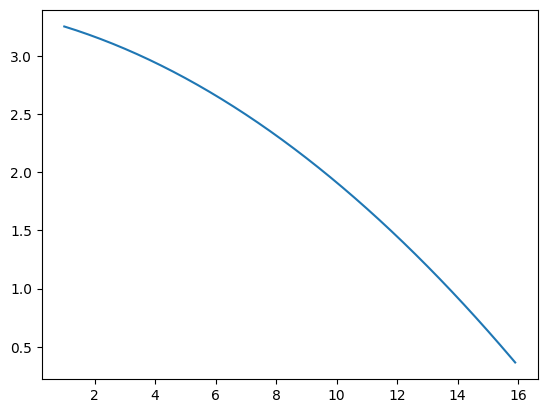

In [40]:
matrix_a3 = np.matrix([[1, 1, 1], [64, 8, 1], [225, 15, 1]])
matrix_b3 = np.matrix([[f(1)], [f(8)], [f(15)]])
approx_params_3 = linalg.solve(matrix_a3, matrix_b3)

def y_approx_3(x):
    return approx_params_3[0] * x ** 2 + approx_params_3[1] * x + approx_params_3[2]

plt.plot(x, list(map(y_approx_3, x)))

Возьмем 4 точки на отрезке [1, 15] - 1, 4, 10, 15. Проведем через эти точки кубическую параболу. Для этого решим следующую систему линейных уравнений:

\begin{cases} x_1 + x_2 + x_3 + x_4 = f(1) \approx 3.25 \\ 64x_1 + 16x_2 + 4x_3 + x_4 = f(4) \approx 1.75 \\ 1000x_1 + 100x_2 + 10x_3 + x_4 = f(10) \approx 2.51 \\ 3375x_1 + 225x_2 + 15x_3 + x_4 = f(15) \approx 0.64 \end{cases}

[[-0.00823565]
 [ 0.19333685]
 [-1.29552587]
 [ 4.36264154]]


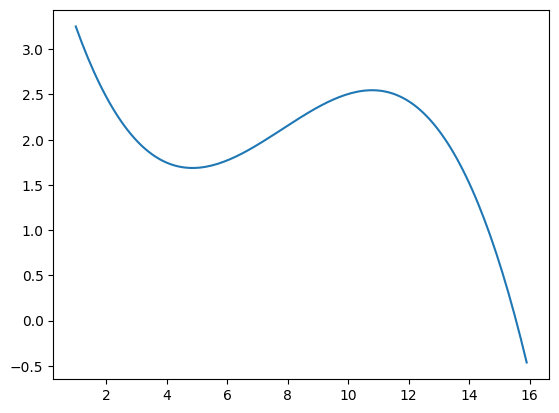

In [44]:
matrix_a4 = np.matrix([[1, 1, 1, 1], [64, 16, 4, 1], [1000, 100, 10, 1], [3375, 225, 15, 1]])
matrix_b4 = np.matrix([[f(1)], [f(4)], [f(10)], [f(15)]])
approx_params_4 = linalg.solve(matrix_a4, matrix_b4)

def y_approx_4(x):
    return approx_params_4[0] * x ** 3 + approx_params_4[1] * x ** 2 + approx_params_4[2] * x + approx_params_4[3]

plt.plot(x, list(map(y_approx_4, x)))

Постороим все получившиеся аппроксимации функции y:

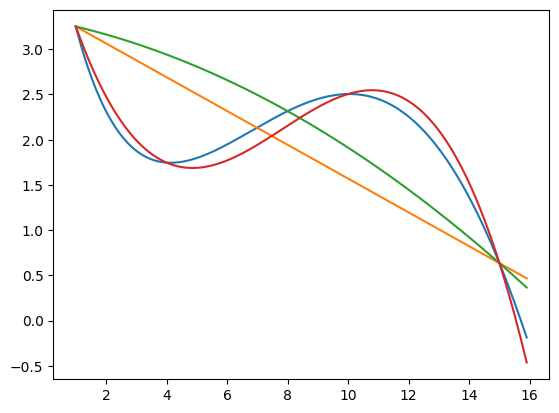

In [46]:
plt.plot(x, y)
plt.plot(x, list(map(y_approx_2, x)))
plt.plot(x, list(map(y_approx_3, x)))
plt.plot(x, list(map(y_approx_4, x)))

Как можем увидеть, линия плохо приближает изначальную функцию, парабола делает это чуть лучше, но также плохо. А вот кубическая парабола хорошо аппроксимирует нашу изначальную функцию.